In [5]:
import numpy as np
from hyppo.independence import Dcorr
from hyppo.independence import Hsic
from hyppo.ksample import MMD
from hyppo.ksample import Energy
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.metrics.pairwise import rbf_kernel

In [80]:
num = [i * 40 for i in range(1, 11)]
N = 100

1.Сгенерируем двумерные векторы с распределениями N(0, E) и N(0,G), где G - матрица с 1 на диагонали и 1/3 вне. На каком размере выборки стандартная реализация а) Energy test б) MMD начинает отличать эти распределения?


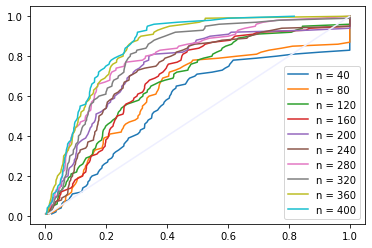

In [81]:
for n in num:
    X = [stats.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]]).rvs(size=n) for i in range(N)]
    Y = [stats.multivariate_normal(mean=[0, 0], cov=[[1, 1/3], [1/3, 1]]).rvs(size=n) for i in range(N)]
    energy_pvalue = [Energy().test(X[i], Y[i])[1] for i in range(N)]
    plt.plot(sorted(energy_pvalue), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
plt.show()

а) Вывод: достаточно хорошо отличает при размере выборки больше 160

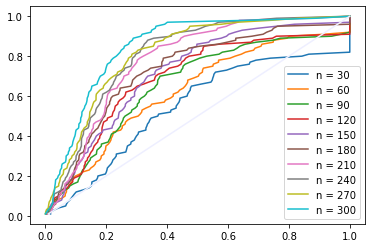

In [27]:
for n in num:
    X = [stats.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]]).rvs(size=n) for i in range(N)]
    Y = [stats.multivariate_normal(mean=[0, 0], cov=[[1, 1/3], [1/3, 1]]).rvs(size=n) for i in range(N)]
    mmd_pvalue = [MMD().test(X[i], Y[i])[1] for i in range(N)]
    plt.plot(sorted(mmd_pvalue), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
plt.show()

б) Вывод: достаточно хорошо отличает при размере выборки больше 180-200

2. 

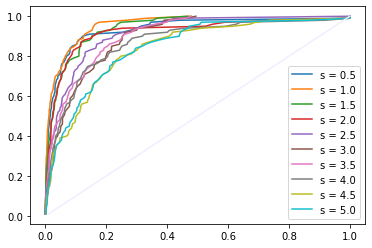

In [3]:
n = 200
N = 100
sigma  = [i/2 for i in range(1, 11)]
for s in sigma:
    def kern(x, y = None):
      return rbf_kernel(x, y, 1/s)
    X = [stats.laplace.rvs(size=n) for i in range(N)]
    Y = [stats.norm(loc=0, scale=np.sqrt(2)).rvs(size=n) for i in range(N)]
    mmd_pvalue = [MMD(compute_kernel = kern).test(X[i], Y[i])[1] for i in range(N)]
    plt.plot(sorted(mmd_pvalue), [(i + 1) / N for i in range(N)], label = 's = ' + str(s))
    plt.legend()
plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
plt.show()

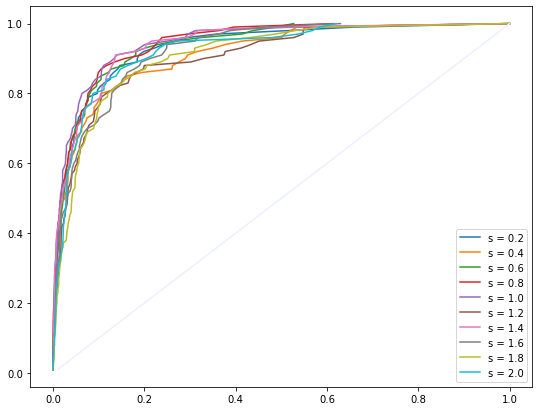

In [4]:
n = 200
N = 100
sigma  = [i/5 for i in range(1, 11)]
plt.figure(figsize = (9, 7))
for s in sigma:
    def kern(x, y = None):
      return rbf_kernel(x, y, 1/s)
    X = [stats.laplace.rvs(size=n) for i in range(N)]
    Y = [stats.norm(loc=0, scale=np.sqrt(2)).rvs(size=n) for i in range(N)]
    mmd_pvalue = [MMD(compute_kernel = kern).test(X[i], Y[i])[1] for i in range(N)]
    plt.plot(sorted(mmd_pvalue), [(i + 1) / N for i in range(N)], label = 's = ' + str(s))
    plt.legend()
plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
plt.show()

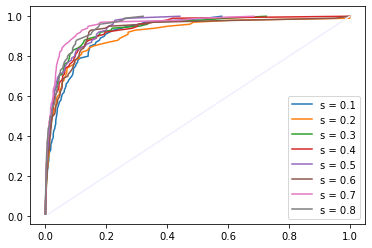

In [5]:
n = 200
N = 100
sigma  = [i/10 for i in range(1, 9)]
for s in sigma:
    def kern(x, y = None):
      return rbf_kernel(x, y, 1/s)
    X = [stats.laplace.rvs(size=n) for i in range(N)]
    Y = [stats.norm(loc=0, scale=np.sqrt(2)).rvs(size=n) for i in range(N)]
    mmd_pvalue = [MMD(compute_kernel = kern).test(X[i], Y[i])[1] for i in range(N)]
    plt.plot(sorted(mmd_pvalue), [(i + 1) / N for i in range(N)], label = 's = ' + str(s))
    plt.legend()
plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
plt.show()

Вывод: оптимальное значение параметра лежит от 0.2 до 0.6

3. Пусть (X,Y) равномерно распределены на 4 кругах радиуса 1 с центрами в точках (1,1), (1,-1), (-1,1), (1,1). Проверить X,Y на зависимость с помощью а) критерия Пирсона б) критерия Спирмена в) критерия Кендалла г) критерия HSIC д) критерия dCov Секея-Риццо. Какие из критериев пригодны для проверки такого рода данных и при каком размере выборки?

In [6]:
def generateXY():
    while True:
        X = stats.uniform(loc=-2, scale=4).rvs()
        Y = stats.uniform(loc=-2, scale=4).rvs()
        if (X - 1)**2 + (Y - 1)**2 < 1 or (X - 1)**2 + (Y + 1)**2 < 1 or (X + 1)**2 + (Y - 1)**2 < 1 or (X + 1)**2 + (Y + 1)**2 < 1:
            return [X, Y]
def gen_data(n):
    X = np.zeros(n)
    Y = np.zeros(n)
    for i in range(n):
        X[i], Y[i] = generateXY()
    return X, Y    
        

In [7]:
n = 2
N = 100
x, y = gen_data(n)

n = 50


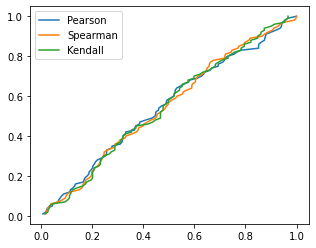

n = 100


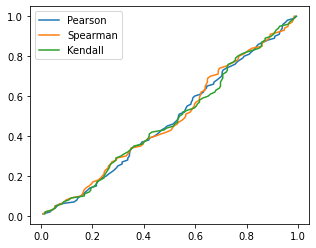

n = 150


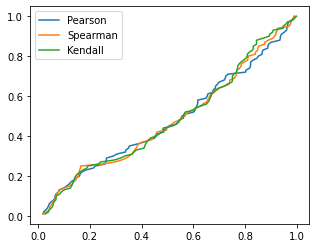

n = 200


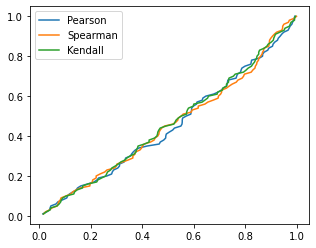

In [116]:
num = [i * 50 for i in range(1, 5)]
for n in num:
    print('n = '+str(n))
    pears_pvalue = []
    sp_pvalue = []
    kend_pvalue = []
    hsic_pvalue = []
    sr_pvalue = []
    for i in range(N): 
        x, y = gen_data(n)
        pears_pvalue.append(stats.pearsonr(x, y)[1])
        sp_pvalue.append(stats.spearmanr(x, y)[1])
        kend_pvalue.append(stats.kendalltau(x, y)[1])
    plt.figure(figsize = (5, 4))
    plt.plot(sorted(pears_pvalue), [(i + 1) / N for i in range(N)], label = 'Pearson')
    plt.plot(sorted(sp_pvalue), [(i + 1) / N for i in range(N)], label = 'Spearman')
    plt.plot(sorted(kend_pvalue), [(i + 1) / N for i in range(N)], label = 'Kendall')
    plt.legend()
    plt.show()

n = 20


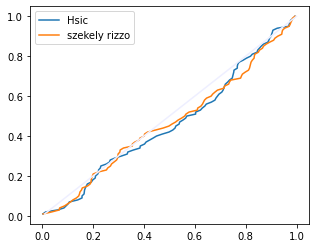

n = 40


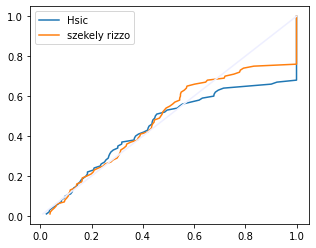

n = 60


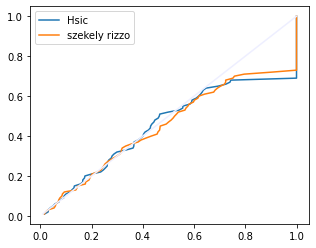

n = 80


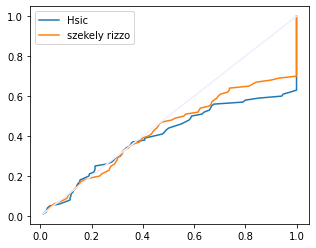

n = 100


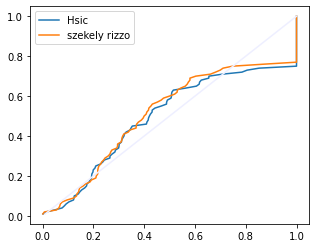

n = 120


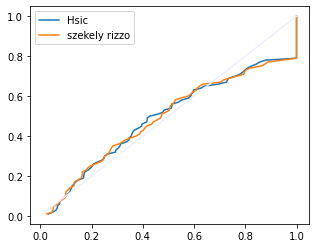

n = 140


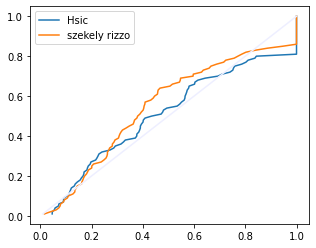

n = 160


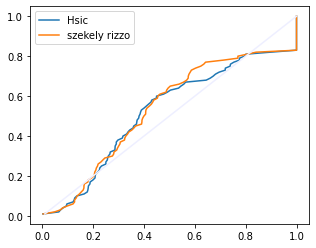

n = 180


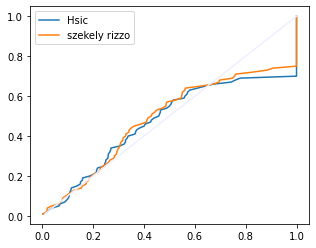

n = 200


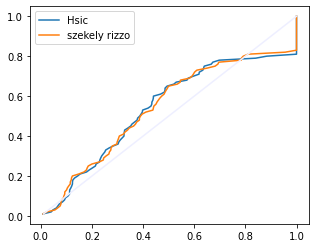

In [121]:
num = [i * 20 for i in range(1, 11)]
for n in num:
    print('n = '+str(n))
    hsic_pvalue = []
    sr_pvalue = []
    for i in range(N): 
        x, y = gen_data(n)
        hsic_pvalue.append(Hsic().test(x, np.array(y))[1])
        sr_pvalue.append(Dcorr().test(x, np.array(y))[1])
    plt.figure(figsize = (5, 4))
    plt.plot(sorted(hsic_pvalue), [(i + 1) / N for i in range(N)], label = 'Hsic')
    plt.plot(sorted(sr_pvalue), [(i + 1) / N for i in range(N)], label = 'szekely rizzo')
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.legend()
    plt.show()

In [ ]:
N = 100
num = [10000]
for n in num:
    print('n = '+str(n))
    hsic_pvalue = []
    sr_pvalue = []
    for i in range(N): 
        x, y = gen_data(n)
        hsic_pvalue.append(Hsic().test(x, np.array(y))[1])
        sr_pvalue.append(Dcorr().test(x, np.array(y))[1])
    plt.figure(figsize = (5, 4))
    plt.plot(sorted(hsic_pvalue), [(i + 1) / N for i in range(N)], label = 'Hsic')
    plt.plot(sorted(sr_pvalue), [(i + 1) / N for i in range(N)], label = 'szekely rizzo')
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.legend()
    plt.show()

n = 10000


Вывод:
Первые три критерия не пригодны для проверки таких гипотез.
Hsic и Dcorr начинают "находить" зависимость примерно с 40. В целом результат Hsic лучше, это видно при больших размерах выборки.